<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 85b3983db4844c9484625cbfb73d0803fa7a1264

json      : 2.0.9
tensorflow: 2.5.0
matplotlib: 3.3.2
pandas    : 1.1.3
keras     : 2.4.3
watermark : 2.1.0
numpy     : 1.19.2



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 62s 200ms/step - loss: 0.6830 - accuracy: 0.5501 - val_loss: 0.5951 - val_accuracy: 0.6876
Epoch 2/10
196/196 [==============================] - 43s 218ms/step - loss: 0.4780 - accuracy: 0.7900 - val_loss: 0.4051 - val_accuracy: 0.8268
Epoch 3/10
196/196 [==============================] - 44s 223ms/step - loss: 0.2945 - accuracy: 0.8810 - val_loss: 0.3960 - val_accuracy: 0.8361
Epoch 4/10
196/196 [==============================] - 38s 194ms/step - loss: 0.1835 - accuracy: 0.9357 - val_loss: 0.4497 - val_accuracy: 0.8188
Epoch 5/10
196/196 [==============================] - 23s 117ms/step - loss: 0.1018 - accuracy: 0.9704 - val_loss: 0.4985 - val_accuracy: 0.8134
Epoch 6/10
196/196 [==============================] - 22s 114ms/step - loss: 0.0536 - accuracy: 0.9857 - val_loss: 0.5592 - val_accuracy: 0.8120
Epoch 7/10
196/196 [==============================] - 24s 124ms/step - loss: 0.0308 - accuracy: 0.9939 - val_loss: 0.6491 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

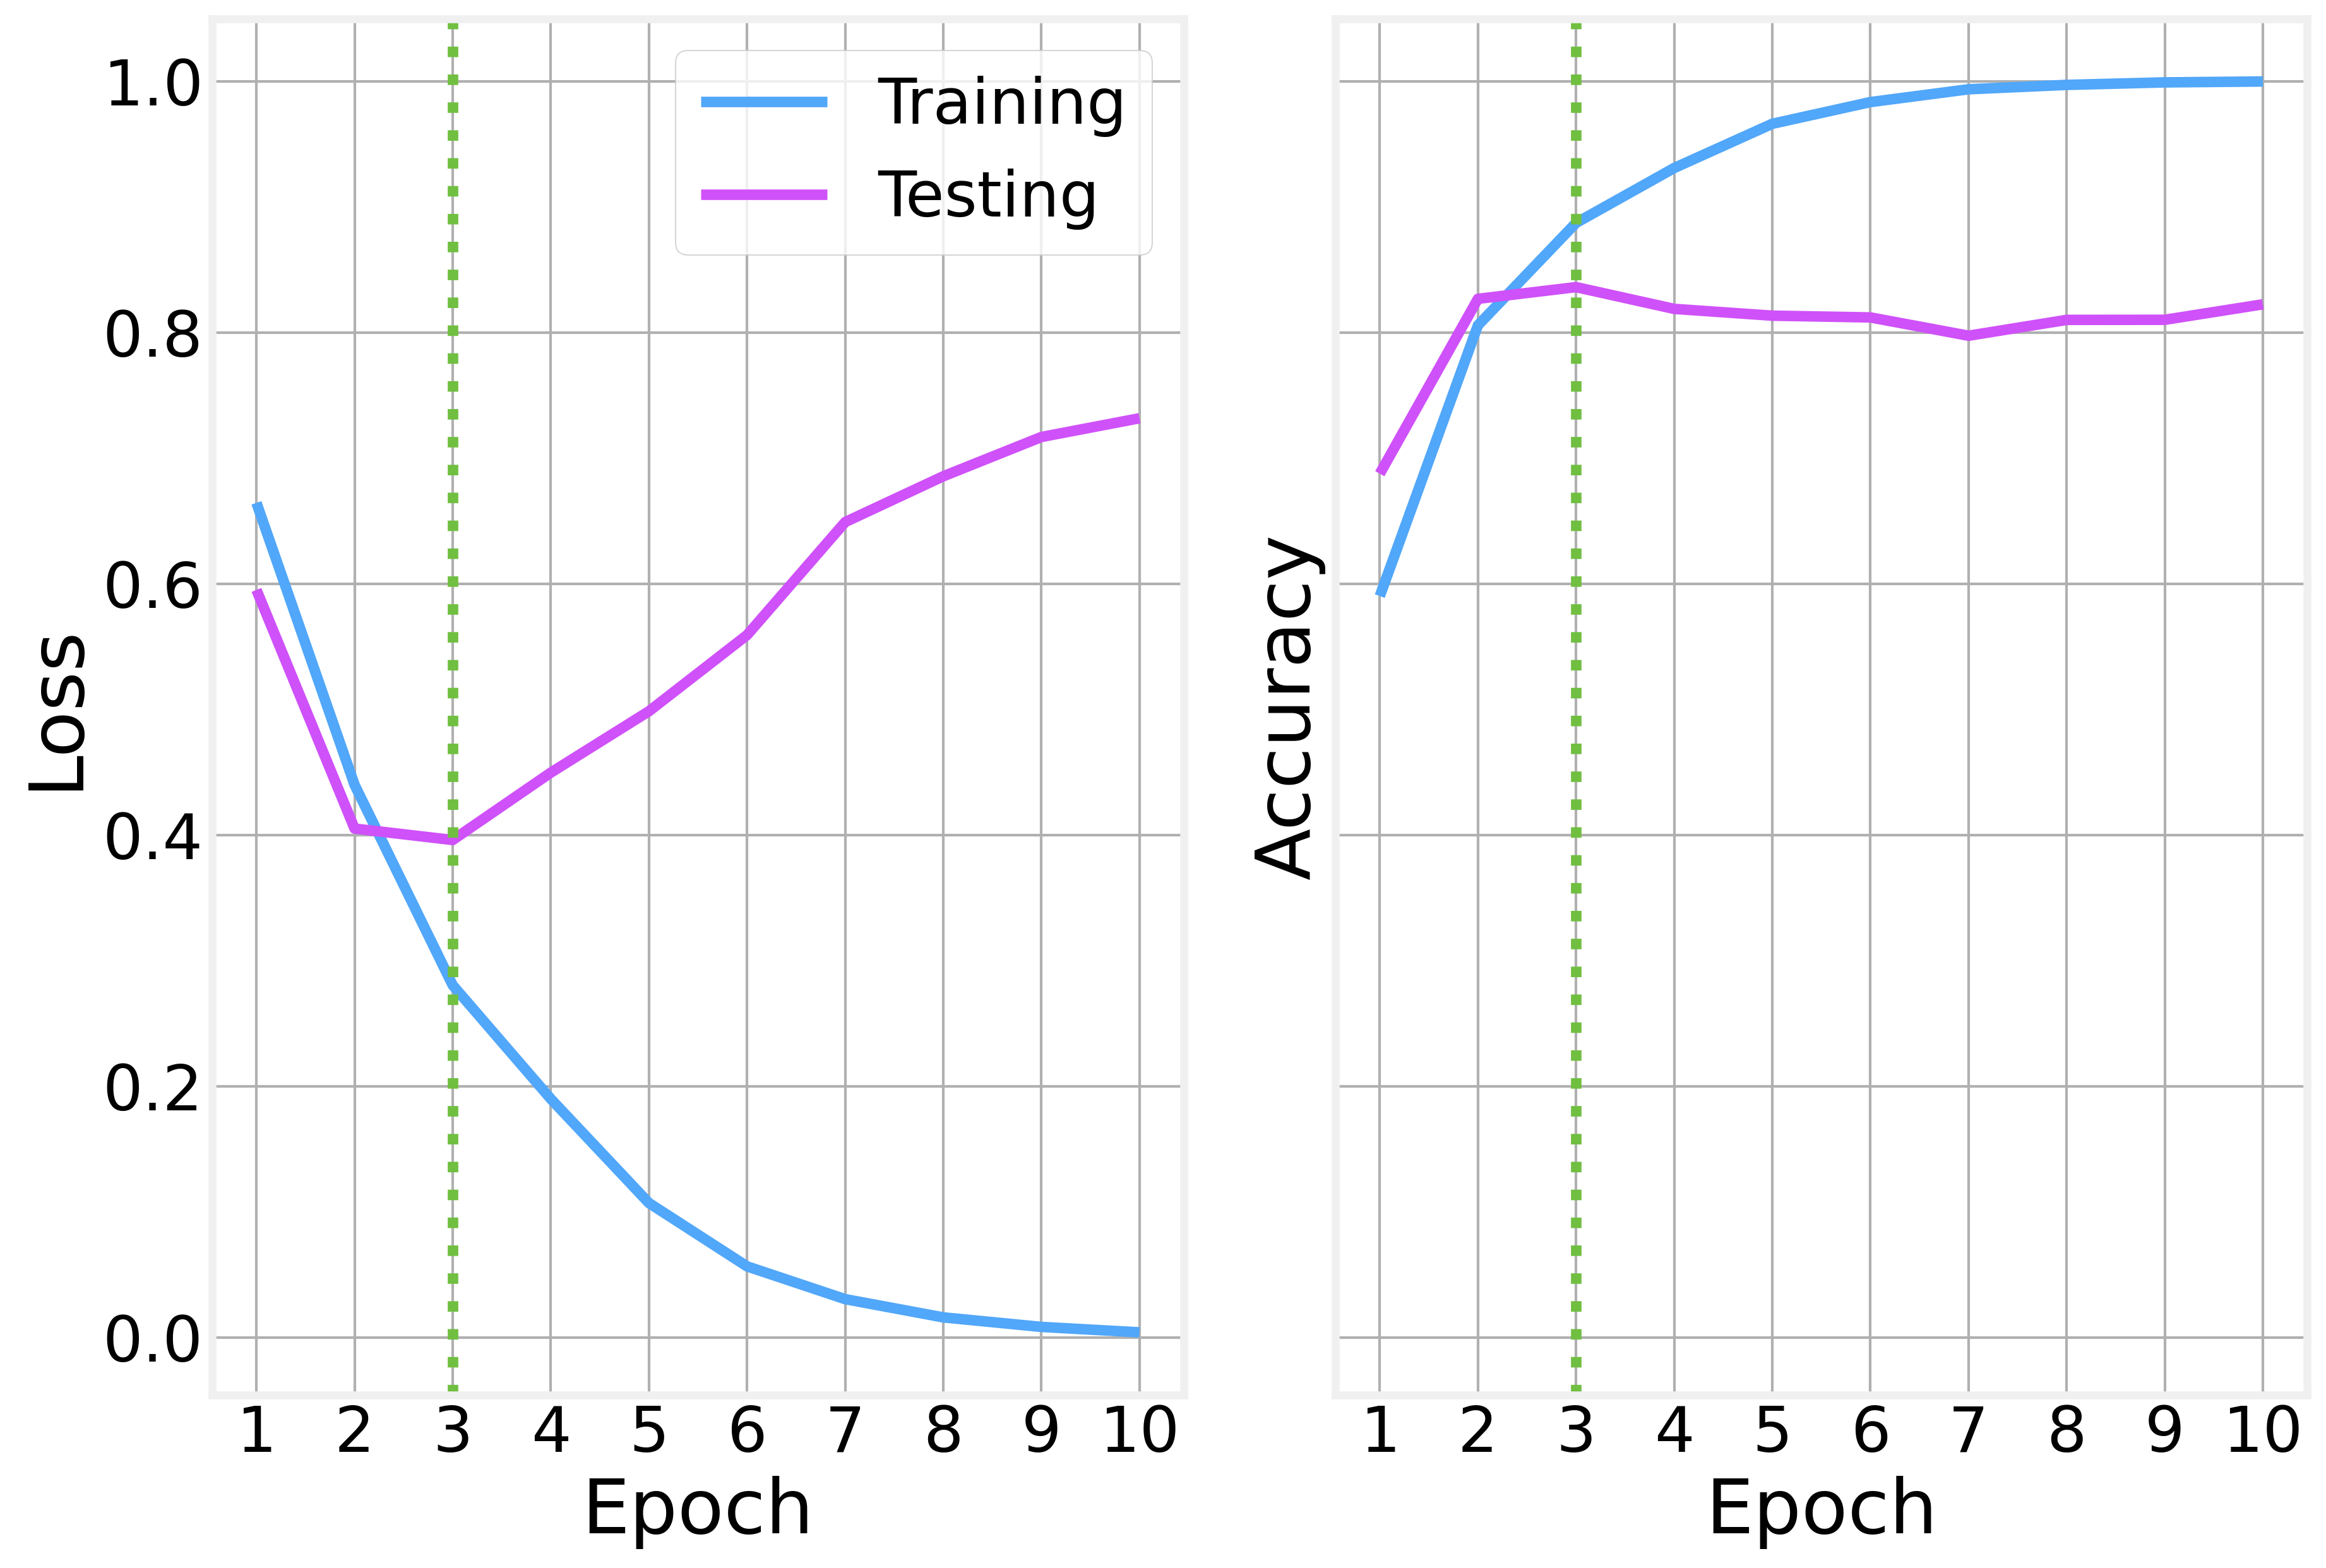

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 64s 301ms/step - loss: 0.6226 - accuracy: 0.6210 - val_loss: 0.3491 - val_accuracy: 0.8494
Epoch 2/10
196/196 [==============================] - 35s 181ms/step - loss: 0.2900 - accuracy: 0.8839 - val_loss: 0.3428 - val_accuracy: 0.8613
Epoch 3/10
196/196 [==============================] - 38s 192ms/step - loss: 0.2037 - accuracy: 0.9248 - val_loss: 0.3369 - val_accuracy: 0.8638
Epoch 4/10
196/196 [==============================] - 43s 221ms/step - loss: 0.1675 - accuracy: 0.9418 - val_loss: 0.3443 - val_accuracy: 0.8605
Epoch 5/10
196/196 [==============================] - 39s 200ms/step - loss: 0.1525 - accuracy: 0.9483 - val_loss: 0.3671 - val_accuracy: 0.8603
Epoch 6/10
196/196 [==============================] - 41s 208ms/step - loss: 0.1203 - accuracy: 0.9615 - val_loss: 0.4302 - val_accuracy: 0.8613
Epoch 7/10
196/196 [==============================] - 41s 207ms/step - loss: 0.0946 - accuracy: 0.9716 - val_loss: 0.4960 - val_ac

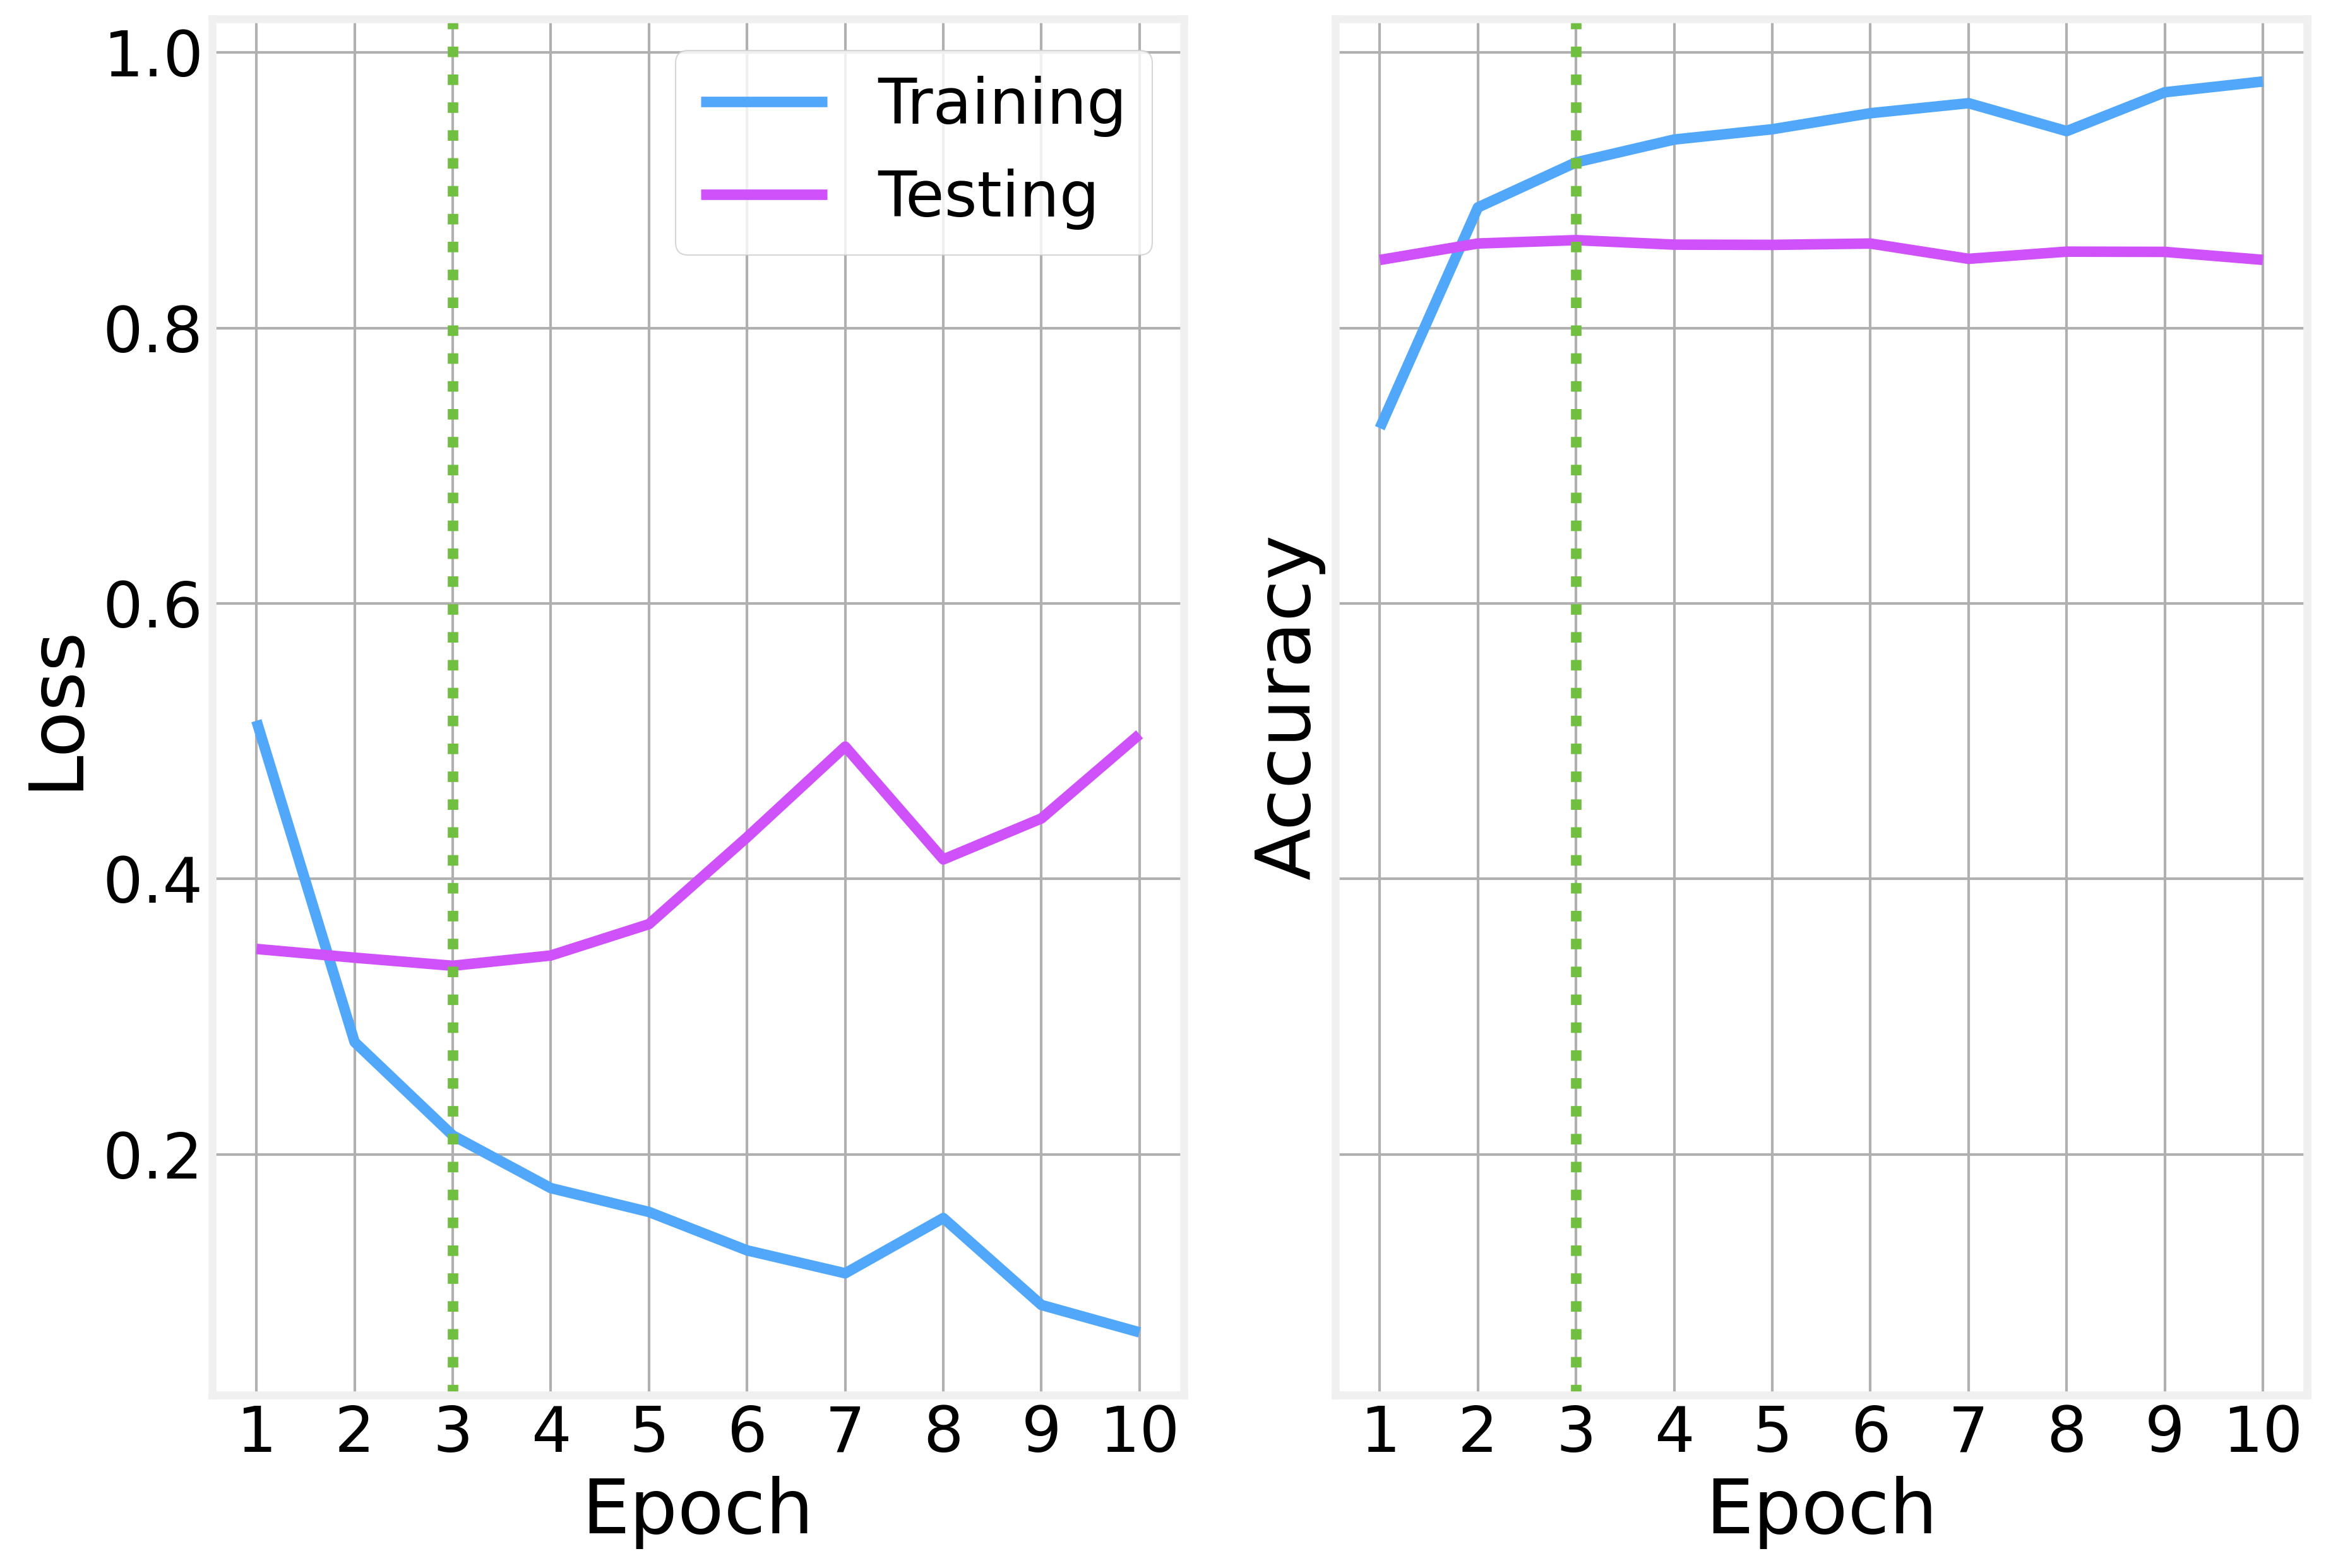

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 49s 237ms/step - loss: 0.5993 - accuracy: 0.6507 - val_loss: 0.3235 - val_accuracy: 0.8626
Epoch 2/10
196/196 [==============================] - 47s 240ms/step - loss: 0.2451 - accuracy: 0.9075 - val_loss: 0.2925 - val_accuracy: 0.8798
Epoch 3/10
196/196 [==============================] - 44s 224ms/step - loss: 0.1776 - accuracy: 0.9386 - val_loss: 0.3290 - val_accuracy: 0.8641
Epoch 4/10
196/196 [==============================] - 46s 234ms/step - loss: 0.1528 - accuracy: 0.9479 - val_loss: 0.3334 - val_accuracy: 0.8692
Epoch 5/10
196/196 [==============================] - 45s 228ms/step - loss: 0.1192 - accuracy: 0.9614 - val_loss: 0.3856 - val_accuracy: 0.8670
Epoch 6/10
196/196 [==============================] - 47s 238ms/step - loss: 0.0919 - accuracy: 0.9714 - val_loss: 0.4304 - val_accuracy: 0.8627
Epoch 7/10
196/196 [==============================] - 47s 239ms/step - loss: 0.0873 - accuracy: 0.9720 - val_loss: 0.4688 - val_ac

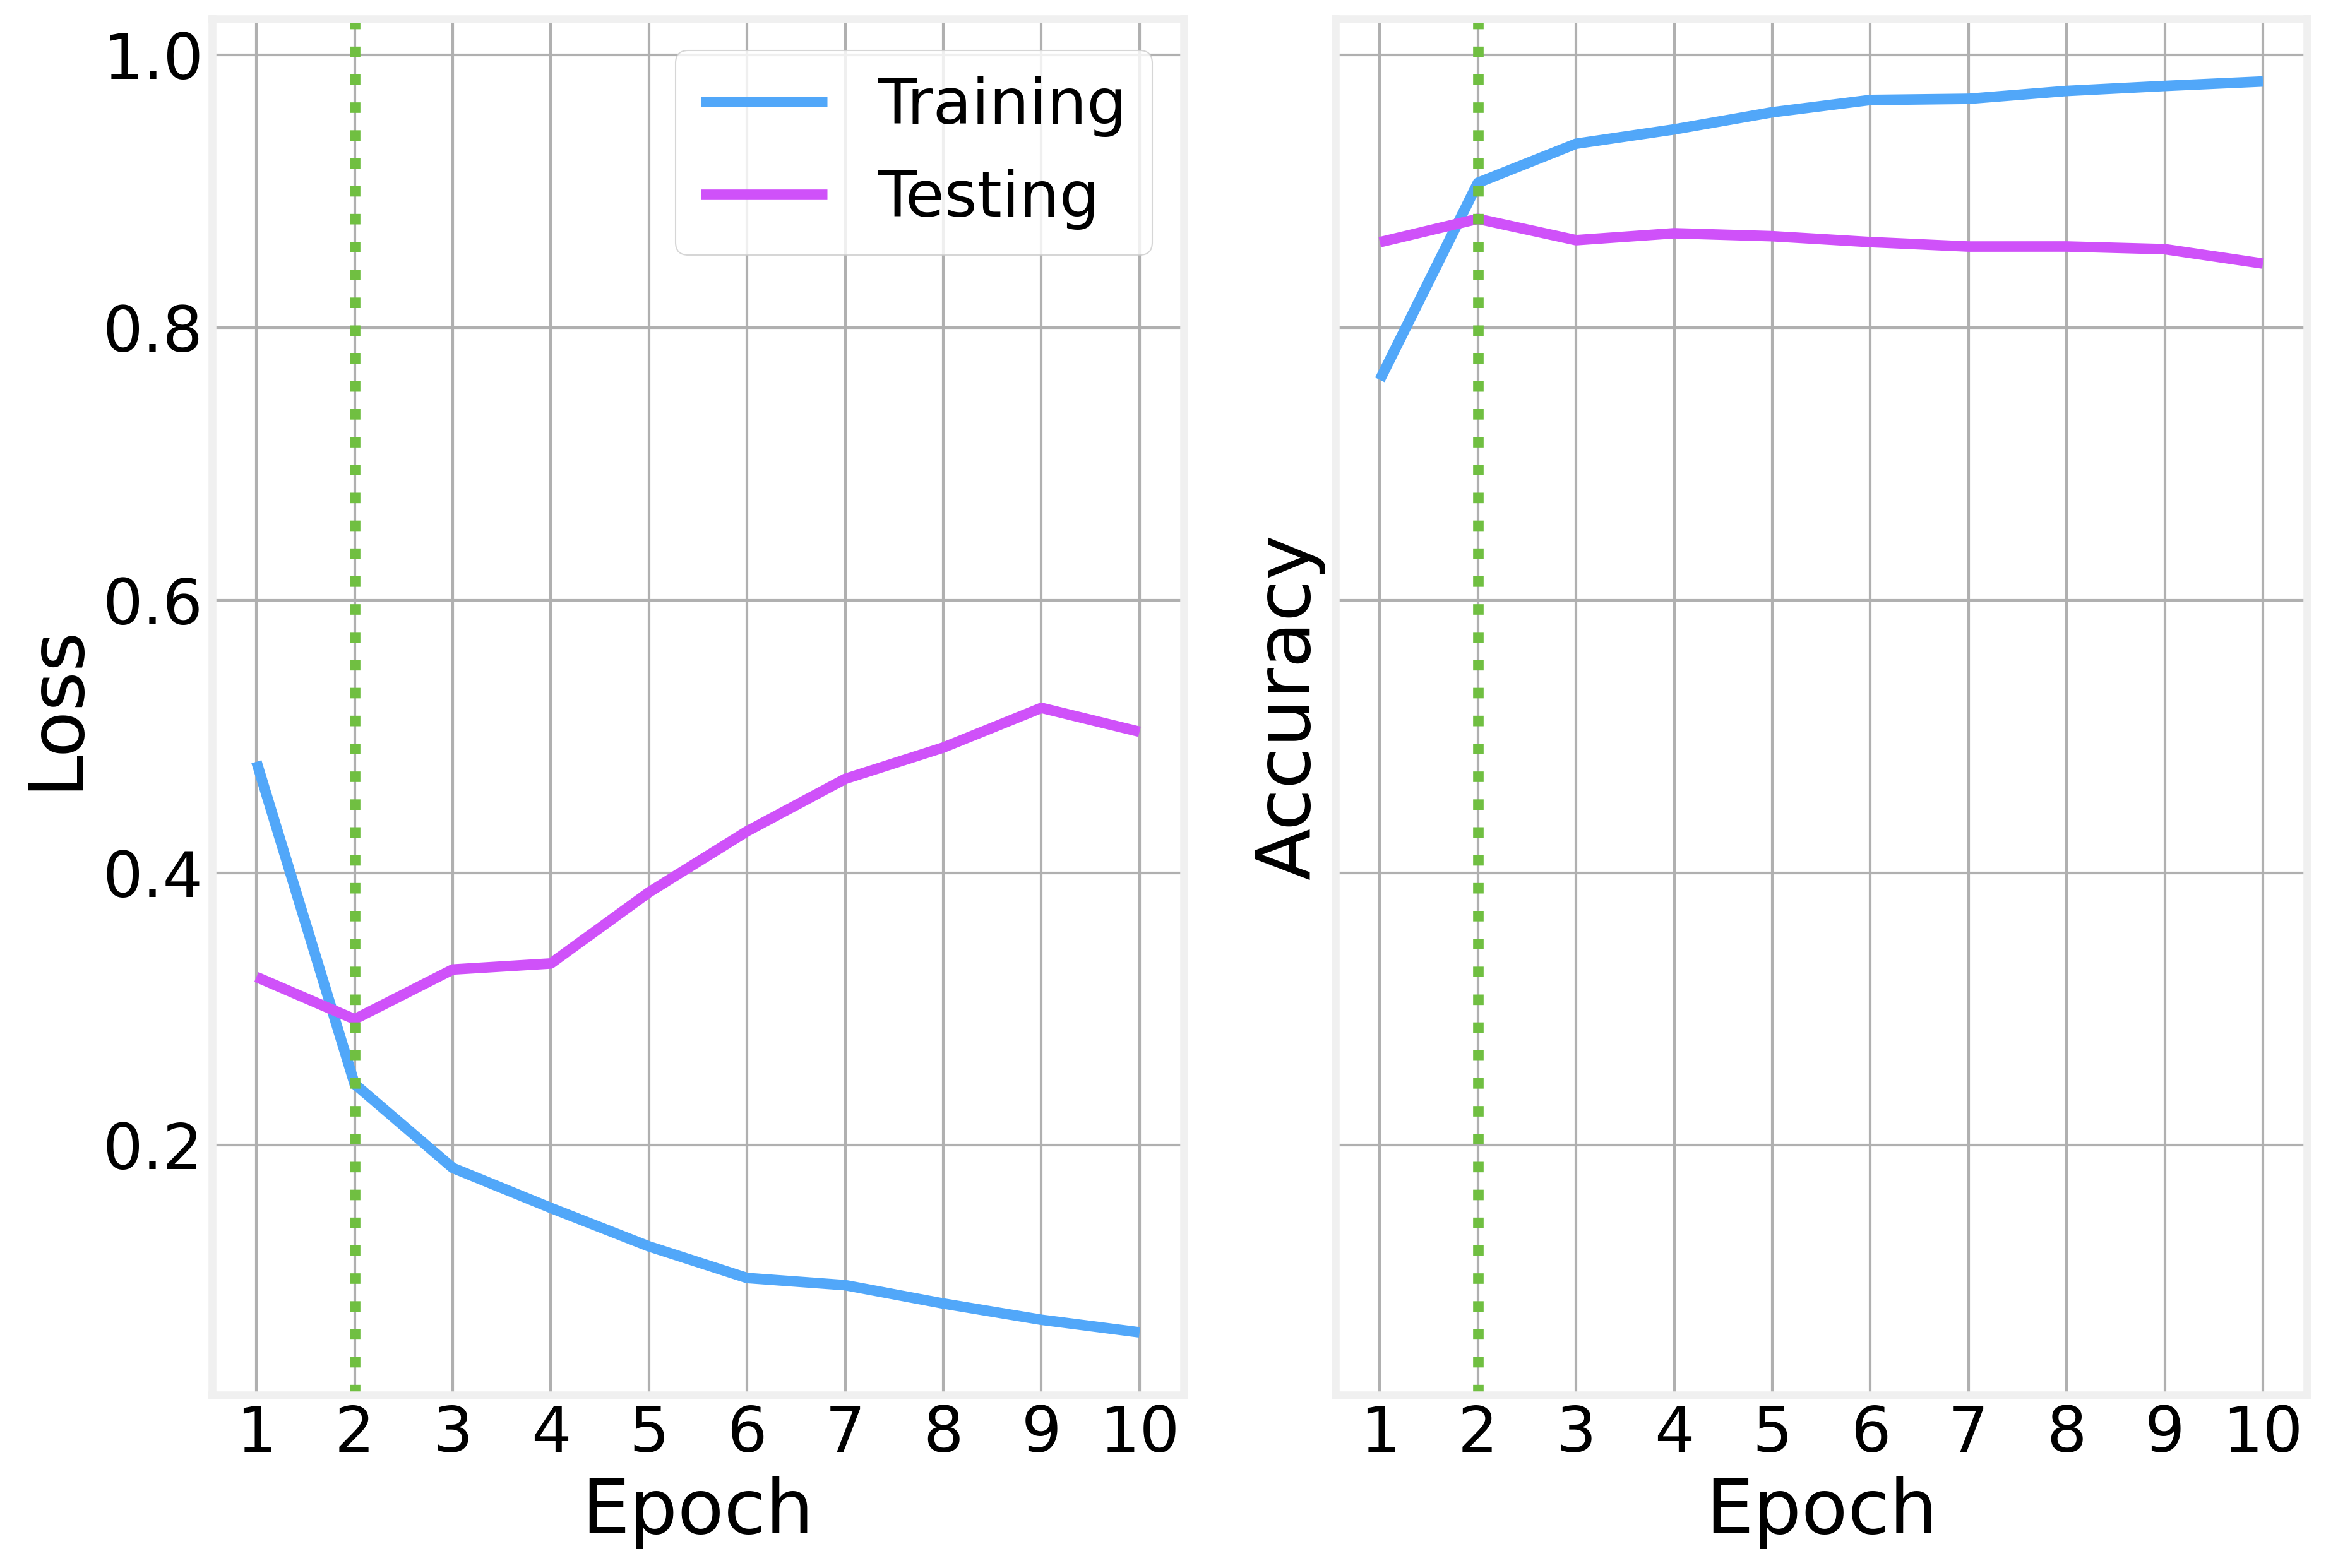

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>